# Overview
Most telecommmunication companies tend to be affected by churn. High churn which basically means many customers dont stick around very long tends to have affect these companies. Customer churn has several negative effects on telecom companies. These include reduced revenue, increased customer acquisition costs, and potential damage to brand reputation. Additionally, high churn rates can lead to a decrease in overall profitability and market share.



# Business understanding 
Syria Tel Company tends to face this problems and it tends to reduce the amount of revenue lost due to churn.The aim is to predict patterns that tend to 
influence the customer behaviour so that they can handle churn and be able to able to build the brand reputation and increase profits being generated and 
overal market share.


# Objectives 
-  Use models to achieve better profitability
-  build a classifier to predict customer behaviour
-  Come up wuth recommendations to solve this kind of problem


# Data understanding

In [159]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif


In [160]:
df = pd.read_csv('SyrialTelChurn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [162]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [163]:
df['churn'].value_counts(normalize=True)  # Check class balance

False    0.855086
True     0.144914
Name: churn, dtype: float64

# Data Preparation 

In [164]:
# Drop irrelevant columns
df = df.drop(['state', 'area code', 'phone number'], axis=1)

In [165]:
# Encode binary categorical columns
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

# Convert churn column to binary integer (if not already)
df['churn'] = df['churn'].astype(int)

In [166]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [167]:
df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [168]:
# Check correlation with target
correlations = df.corr()['churn'].sort_values(ascending=False)
print(correlations)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


# Different customer attributes in relation to churn

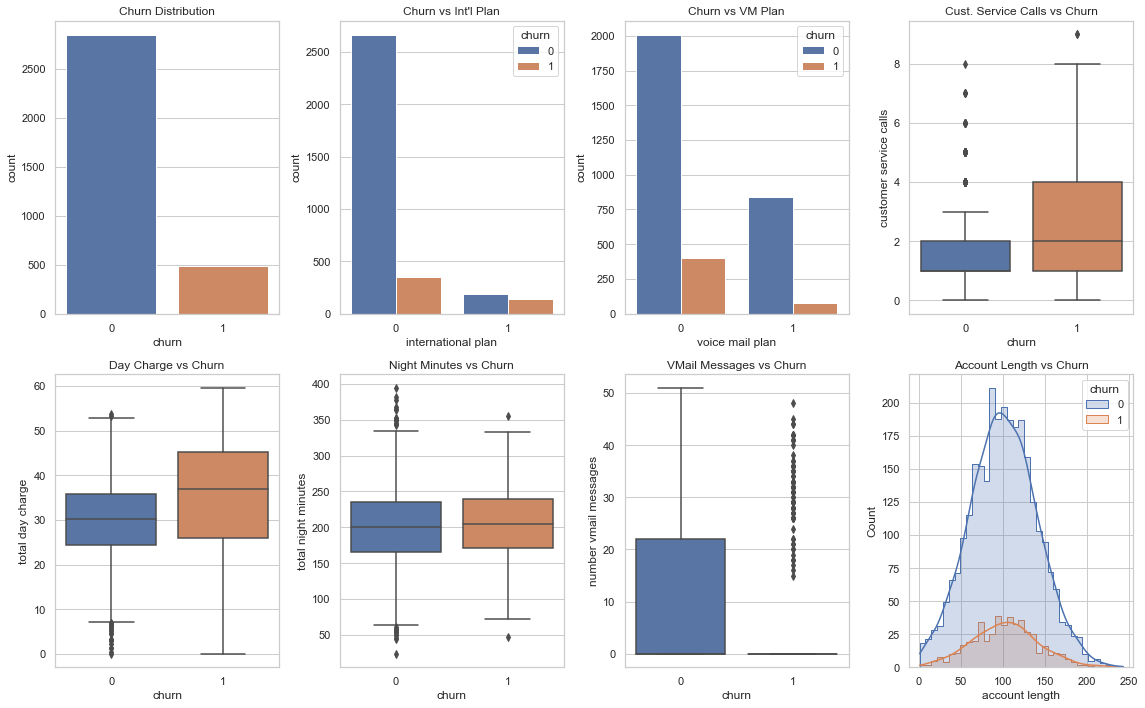

In [186]:
#set up the plots
plt.figure(figsize=(16,10))

plots = [
    {"type": "count", "x": "churn", "title": "Churn Distribution"},
    {"type": "count", "x": "international plan", "hue": "churn", "title": "Churn vs Int'l Plan"},
    {"type": "count", "x": "voice mail plan", "hue": "churn", "title": "Churn vs VM Plan"},
    {"type": "box", "x": "churn", "y": "customer service calls", "title": "Cust. Service Calls vs Churn"},
    {"type": "box", "x": "churn", "y": "total day charge", "title": "Day Charge vs Churn"},
    {"type": "box", "x": "churn", "y": "total night minutes", "title": "Night Minutes vs Churn"},
    {"type": "box", "x": "churn", "y": "number vmail messages", "title": "VMail Messages vs Churn"},
    {"type": "hist", "x": "account length", "hue": "churn", "title": "Account Length vs Churn"}
]

# Loop through and plot each subplot
for i, plot in enumerate(plots, 1):
    plt.subplot(2, 4, i)
    if plot["type"] == "count":
        sns.countplot(x=plot["x"], hue=plot.get("hue"), data=df)
    elif plot["type"] == "box":
        sns.boxplot(x=plot["x"], y=plot["y"], data=df)
    elif plot["type"] == "hist":
        sns.histplot(data=df, x=plot["x"], hue=plot.get("hue"), kde=True, element='step')
    plt.title(plot["title"])

plt.tight_layout()
plt.show()

-  Churn Distribution:Most customers did not churn.There's a class imbalance, which is important to handle when modeling.
-  Churn vs International Plan: Customers with an international plan are more likely to churn than those without. 
-  Churn vs Voice Mail Plan: Customers with a voice mail plan are less likely to churn, suggesting some retention effect.
-  Customer Service Calls vs Churn: Customers who made many service calls tend to churn more. Suggests dissatisfaction triggers churn.
-  Total Day Charge vs Churn: Higher daytime charges are associated with higher churn, possibly due to usage or cost concerns.
-  Total Night Minutes vs Churn: No strong visible pattern—churn appears consistent across night usage.
-  Number of Voice Mail Messages vs Churn: Customers who use voicemail less tend to churn more.
-  Account Length vs Churn: Churn occurs across various account lengths, indicating tenure alone doesn’t predict churn.

Some features like international plan, customer service calls, and day charge show clear separation between churners and non-churners. These are likely to be strong predictors and should be included in the model. Features showing weak or no patterns (like night minutes or account length) may have lower predictive power.


# Impact of Customer Usage and Service Calls on Churn

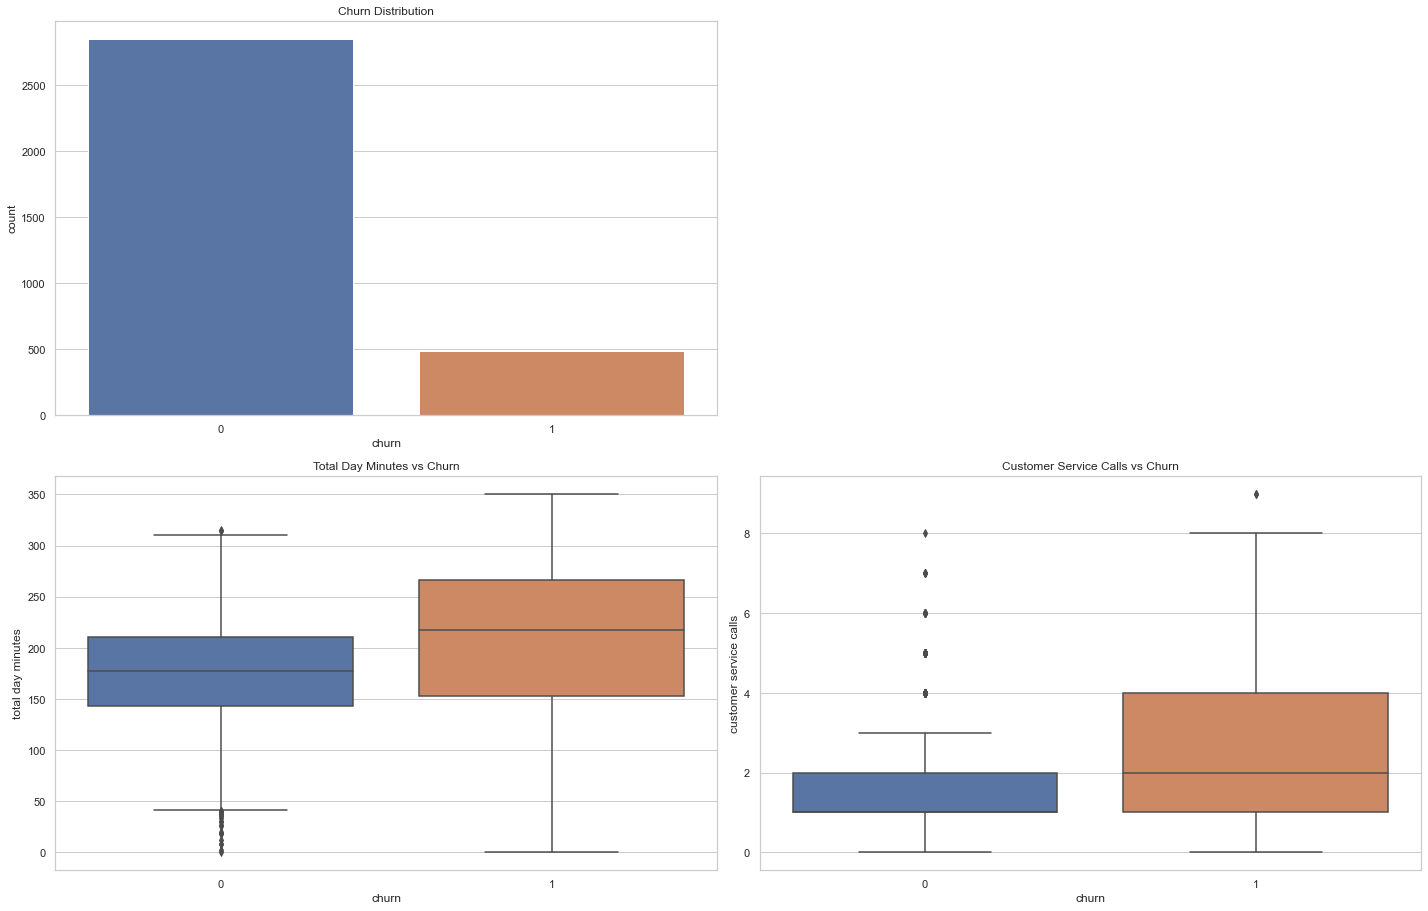

In [181]:
# Set up plots
plt.figure(figsize=(20,25))

# 1. Churn distribution
plt.subplot(4,2,1)
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')

# 3. Numerical features vs churn - Total day minutes
plt.subplot(4,2,3)
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes vs Churn')

# 4. Customer service calls vs churn
plt.subplot(4,2,4)
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls vs Churn')

plt.tight_layout()
plt.show()


This set of plots provides valuable insights into customer churn behavior:

The Churn Distribution plot shows that the dataset is imbalanced, with significantly more customers not churning (churn = 0) than those who do (churn = 1). This is important to consider when building a model, as it may affect performance and require techniques like class weighting or resampling.

The Total Day Minutes vs Churn boxplot indicates that customers who churn tend to use more daytime minutes, suggesting high usage may correlate with dissatisfaction or higher bills, leading to churn.

The Customer Service Calls vs Churn boxplot shows that churned customers tend to make more customer service calls, which may indicate unresolved issues or poor customer experience—an important signal for churn prediction.

These insights suggest that both usage behavior and customer interaction are key indicators of churn risk.

## Visualization based on correlation and Mutual Information

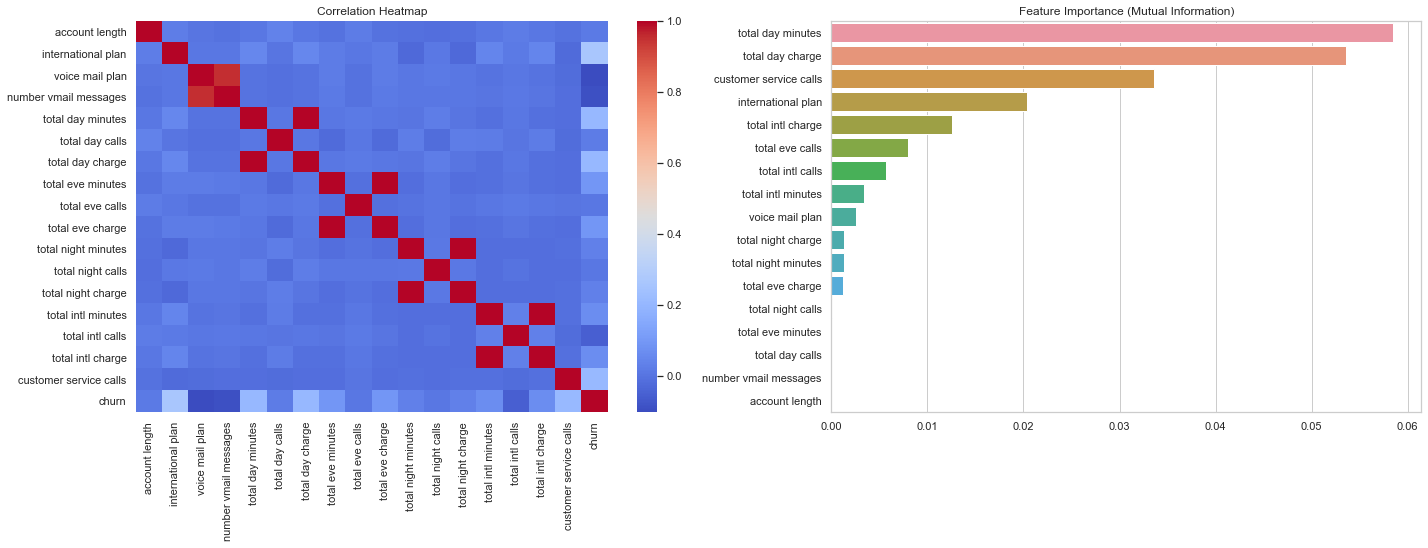

In [171]:
# Set up plots
plt.figure(figsize=(20, 25))
# 7. Correlation heatmap
plt.subplot(4, 2, 7)
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 8. Feature importance using mutual info
plt.subplot(4, 2, 8)
X = df.drop(columns=['churn'])
y = df['churn']
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
sns.barplot(x=mi_series, y=mi_series.index)
plt.title('Feature Importance (Mutual Information)')

plt.tight_layout()
plt.show()

## Correlation Heatmap
Shows linear relationships between numerical features.
Helps identify: Features positively/negatively correlated with churn, Multicollinearity (features strongly correlated with each other), Useful for detecting redundancy
# Mutual Information (MI) Plot 
Measures non-linear associations between features and churn. Higher MI = more predictive power. Works well with categorical features (like international plan).Helps rank features by importance for churn prediction. The goal is to Identify which features are useful for predicting churn. Exclude irrelevant or redundant features.
# Features Likely to Keep
Based on correlation & MI:international plan, voice mail plan, customer service calls, total day charge or total day minutes, total intl calls, number vmail messages
#  Features Likely to Drop
Due to low predictive value or redundancy: account length (low MI), total night charge / minutes (low variance across churn)